# **Digital Signal and Image Management - E03**<br/>
**Master's Degree in Data Science (A.Y. 2023/2024)**<br/>
**University of Milano - Bicocca**<br/>

prof. Simone Bianco,
dr. Marco Buzzelli

**Outline**:
* An **image** is encoded digitally as a matrix of values:
  * Two dimensions for a grayscale image (height and width)
  * Three dimensions for a color image (height, width, and color channels)
* We will use grayscale images to experiment with various processing **operators**
  * Punctual operators
  * Local operators
* We will use color images to understand different types of **color encoding**

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Image management
from skimage import io # Input/output
from skimage import transform # Geometric transformations (e.g. resize)
from skimage import filters # Local processing
from skimage import color # Change of color space

In [3]:
# Set visualization size for figures (notebook only)
plt.rcParams['figure.figsize'] = [15,5] # width, height

### YCbCr (Luma / Chroma blue-yellow / Chroma red-green)

https://en.wikipedia.org/wiki/YCbCr#CbCr

* YCbCr is another color space that separates a brightness-like component (Luma) from the color components (Chroma).
* The colors are encoded as:
  * Cb: a high value indicates blue, a low value indicates its opposite yellow.
  * Cr: a high value indicates red, a low value indicates its opposite red.
* It is used, for example, in the JPEG compression.
  * Note that this is transparent to us: when we import a jpg image using `imread`, this gets decompressed and converted in RGB automatically.

#### Assignment: image compression based on color representation

* Our human visual system is more sensitive to details/changes in brightness, and much less sensitive to details/changes in color.
* This is at the core of many compression algorithms:
  * They reduce the amount of information that encodes color
  * This translates to a smaller file size
  * There is little negative impact on the final quality of the image
* For the assignement, we will use Gaussian blur as a technique to reduce the amount of information.
  * This is not what JPEG does, and it does not necessarily translate to a smaller file size, but it easily illustrates the concept.
  * For the purpose of the assignement, you are not expected to save the images and evaluate the file size.

**Approach**:

1. Choose a new image, different from the ones used in this notebook
2. Convert it into YCbCr color space
3. Blur Cb and Cr channels using a wide gaussian filter
4. Visualize each channel of the YCbCr, and the rebuilt resulting RGB image
5. Blur only the Y channel (and keep the original Cb and Cr)
6. Visualize each channel of the YCbCr, and the rebuilt resulting RGB image

You *must* test (and show) different sizes of the gaussian filter to appreciate the degree of tolerance of the human eye to color compression.

Hint:
* If you obtain unexpected results, pay attention to the `multichannel` or the `channel_axis` parameter in the gaussian transformation, and to the data type.

In [12]:

import numpy as np
from matplotlib import pyplot as plt

# Image management
from skimage import io # Input/output
from skimage import transform # Geometric transformations (e.g. resize)
from skimage import filters # Local processing
from skimage import color # Change of color space

# Set visualization size for figures (notebook only)
plt.rcParams['figure.figsize'] = [15,5] # width, height

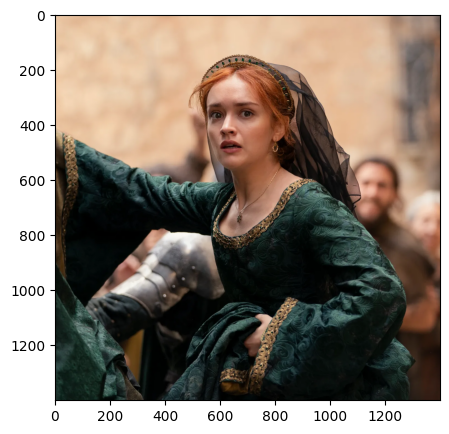

In [13]:
# Re-open the red panda image
im = io.imread('C:/Users/sam/Desktop/DSP/Resources/tgr.webp')
plt.imshow(im); plt.show()

The loaded image is RGB type, the 3 channels are therefore loaded, for the assignment it is required to use the YCbCr representation, for this it is converted into the required color space.

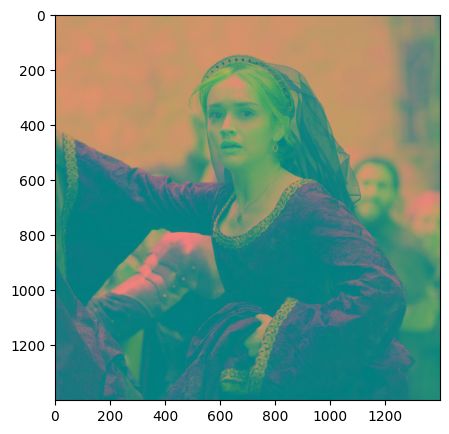

In [19]:
#Step 2. Convert it into YCbCr color space

img_ycbcr = color.rgb2ycbcr(im[:,:,0:3])
plt.imshow(im_ycbcr)



Text(0.5, 1.0, 'Cr')

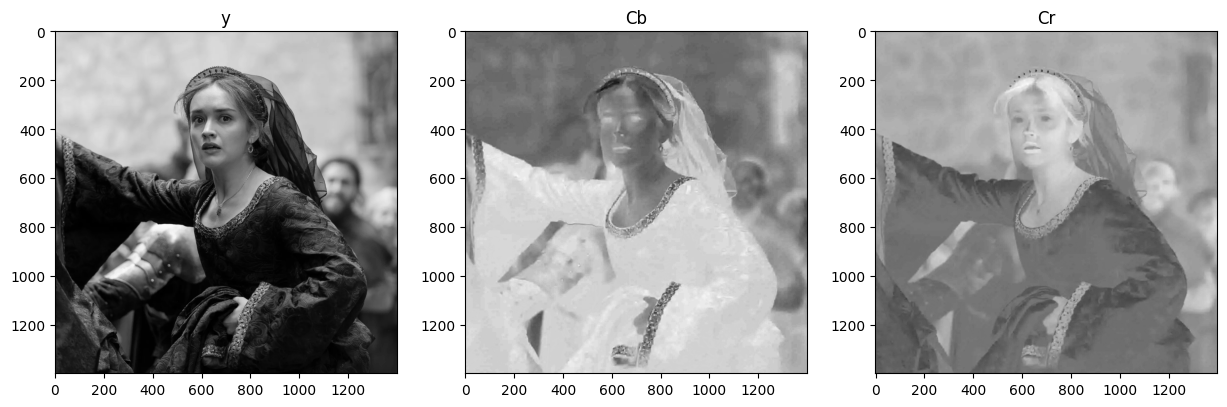

In [20]:
#The different components of the image in the destination color space are displayed



plt.subplot(1,3,1); plt.imshow(img_ycbcr[:,:,0], cmap='gray'); plt.title('y')
plt.subplot(1,3,2); plt.imshow(img_ycbcr[:,:,1], cmap='gray'); plt.title('Cb')
plt.subplot(1,3,3); plt.imshow(img_ycbcr[:,:,2], cmap='gray'); plt.title('Cr')

Blur on Cb and Cr A Gaussian filter is applied on the two components that describe the color of the image:

**Cb: acts on the blue and yellow chromatic channel

**Cr: acts on the red and green chromatic channel

In [50]:
#Step 3. Blur the Cb Cr channels with a wide Gaussian Filter


img_blurCbCr = img_ycbcr.copy()

#We start by applying a Gaussian filter with a low sigma, with a value of 1, in the following steps the behavior of the filter with higher sigmas is shown

img_blurCbCr[:,:,1]=filters.gaussian(img_blurCbCr[:,:,1], sigma=1)
img_blurCbCr[:,:,2]=filters.gaussian(img_blurCbCr[:,:,2], sigma=1)

Text(0.5, 1.0, 'Cr')

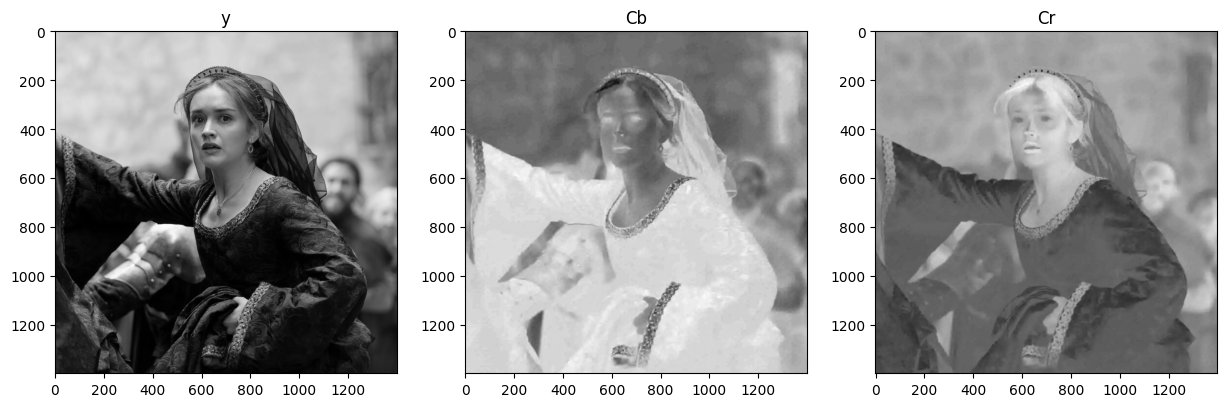

In [51]:

plt.subplot(1,3,1); plt.imshow(img_blurCbCr[:,:,0], cmap='gray'); plt.title('y')
plt.subplot(1,3,2); plt.imshow(img_blurCbCr[:,:,1], cmap='gray'); plt.title('Cb')
plt.subplot(1,3,3); plt.imshow(img_blurCbCr[:,:,2], cmap='gray'); plt.title('Cr')


In order to display the image correctly it is necessary to transform the image back into the RGB color space.

In [37]:

img_blurCbCr_rgb = color.ycbcr2rgb(img_blurCbCr[:,:,0:3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


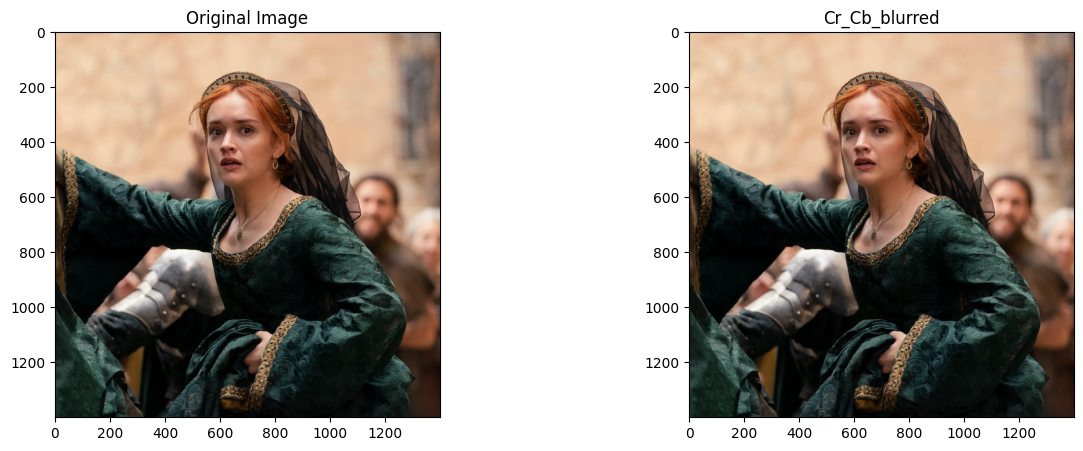

In [38]:

plt.subplot(1,2,2); plt.imshow(img_blurCbCr_rgb); plt.title('Cr_Cb_blurred')
plt.subplot(1,2,1); plt.imshow(im); plt.title('Original Image')
plt.show()

It can be noted that as if blur has been applied via the Gaussian filter to the two components that contain the color information, this does not degrade the image, which is of a quality comparable to the original.

In [56]:
img_blurCbCr_10 = img_ycbcr.copy()
img_blury_10 = img_ycbcr.copy()

In [70]:

img_blurCbCr_10[:,:,1]=filters.gaussian(img_blurCbCr_10[:,:,1], sigma=20)
img_blurCbCr_10[:,:,2]=filters.gaussian(img_blurCbCr_10[:,:,2], sigma=20)

In [71]:

img_blury_10[:,:,0]=filters.gaussian(img_blury_10[:,:,0], sigma=0)

In [72]:

img_blurCbCr_rgb_10 = color.ycbcr2rgb(img_blurCbCr_10[:,:,0:3])
img_blury_rgb = color.ycbcr2rgb(img_ycbcr[:,:,0:3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


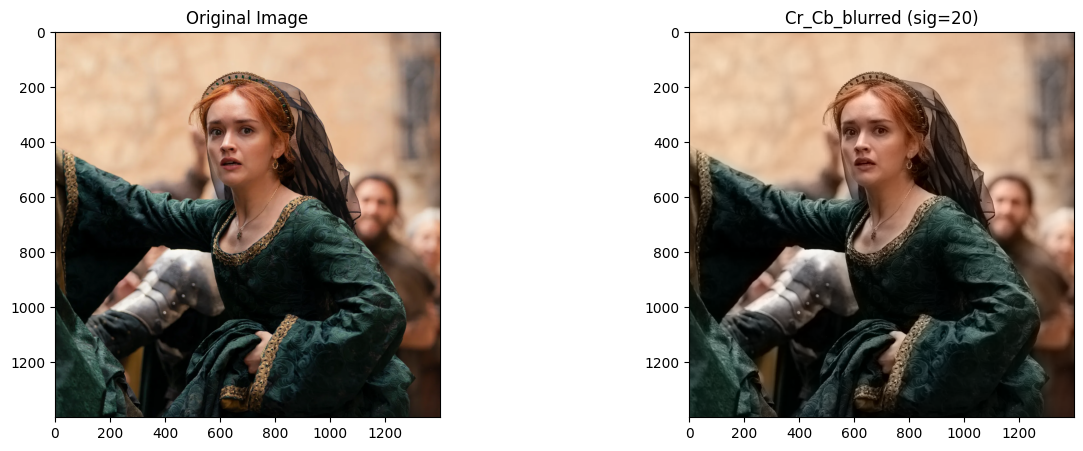

In [74]:


plt.subplot(1,2,2); plt.imshow(img_blurCbCr_rgb_10); plt.title('Cr_Cb_blurred (sig=20)')
plt.subplot(1,2,1); plt.imshow(im); plt.title('Original Image')
plt.show()

In this case you notice, unlike the previous case, that the colors are no longer those of the original image, you can see how the image has lost quality.

Blur Y

As done for the color fields, in this section only the y component is modified, relating to the luminance of the image, the component to which we are most sensitive. As previously, a filter with a sigma equal to 1 is applied and the image obtained after blurring is shown.

In [65]:


img_blury = img_ycbcr.copy()

In [66]:


img_blury[:,:,0]=filters.gaussian(img_blury[:,:,0], sigma=10)

Text(0.5, 1.0, 'Cr')

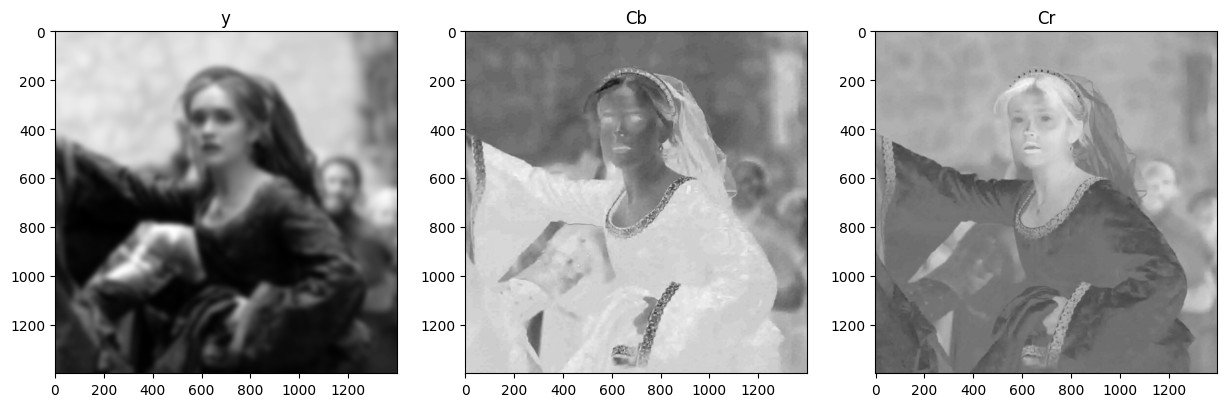

In [67]:

plt.subplot(1,3,1); plt.imshow(img_blury[:,:,0], cmap='gray'); plt.title('y')
plt.subplot(1,3,2); plt.imshow(img_blury[:,:,1], cmap='gray'); plt.title('Cb')
plt.subplot(1,3,3); plt.imshow(img_blury[:,:,2], cmap='gray'); plt.title('Cr')

In [68]:

img_blury_rgb = color.ycbcr2rgb(img_blury[:,:,0:3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


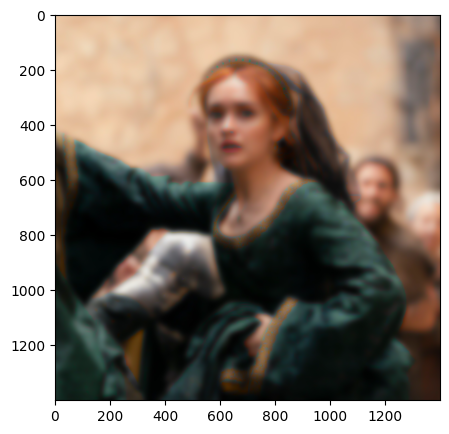

In [69]:
plt.imshow(img_blury_rgb); plt.show()
     

In [88]:
import cv2
from scipy.ndimage import gaussian_filter

def split_y_cr_cb(im):
  #Convert it into YCbCr color space
  im_ycbcr = cv2.cvtColor(im, cv2.COLOR_RGB2YCrCb)
  #Split into the Y Cr Cb channels
  Y, Cr, Cb = cv2.split(im_ycbcr)
  return Y, Cr, Cb


def compress_Y(im, sigma):
  #Get the 3 channels trough a support function
  Y, Cr, Cb = split_y_cr_cb(im)

  #Blur the Y channel
  Y_blurred = gaussian_filter(Y, sigma)

  #Merge the 3 channels (Cr and Cb remains the same while Y was blurred)
  im_ycbcr_blurred = cv2.merge([Y_blurred, Cr, Cb])

  #Convert the YCrCb image back to RGB
  return cv2.cvtColor(im_ycbcr_blurred, cv2.COLOR_YCrCb2RGB)

  
def compress_CbCr(im, sigma):
  #Get the 3 channels trough a support function
  Y, Cr, Cb = split_y_cr_cb(im)
  #Blur the Cb and Cr channels
  Cb_blurred = gaussian_filter(Cb, sigma)
  Cr_blurred = gaussian_filter(Cr, sigma)
  #Merge the 3 channels (Y remains the same while Cr and Cb were blurred)
  im_ycbcr_blurred = cv2.merge([Y, Cr_blurred, Cb_blurred])
  #Convert the YCrCb image back to RGB
  return cv2.cvtColor(im_ycbcr_blurred, cv2.COLOR_YCrCb2RGB)


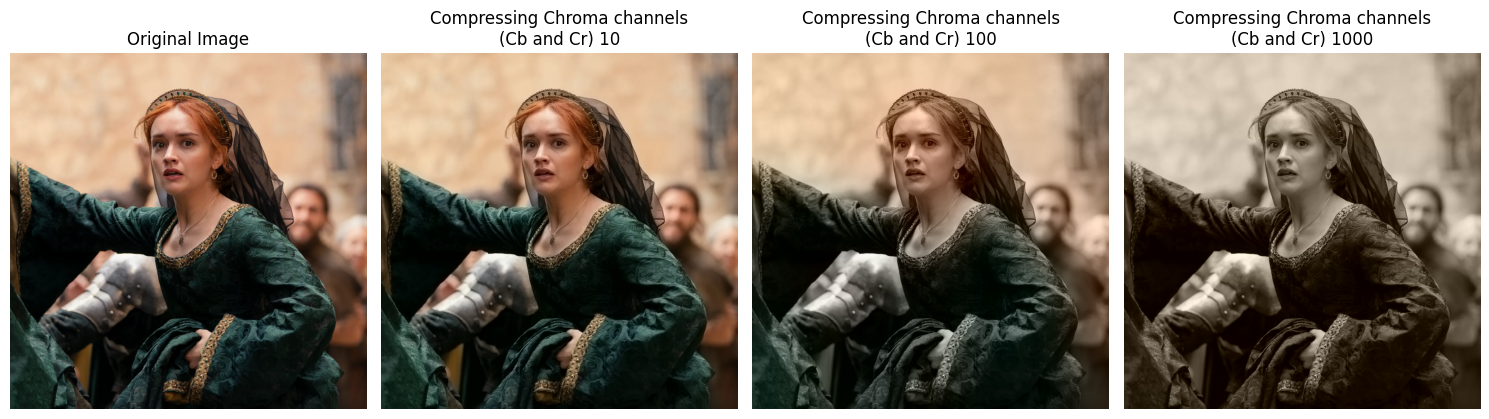

In [93]:
# Compress the Cb and Cr channels with different compression levels
im_cblur_1000 = compress_CbCr(im, 1000)
im_cblur_100 = compress_CbCr(im, 100)
im_cblur_10 = compress_CbCr(im, 10)

# Plot all images on the same plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(im)
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Compressing Chroma channels\n(Cb and Cr) 10')
plt.imshow(im_cblur_10)
plt.axis('off')


plt.subplot(1, 4, 3)
plt.title('Compressing Chroma channels\n(Cb and Cr) 100')
plt.imshow(im_cblur_100)
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Compressing Chroma channels\n(Cb and Cr) 1000')
plt.imshow(im_cblur_1000)
plt.axis('off')

plt.tight_layout()
plt.show()

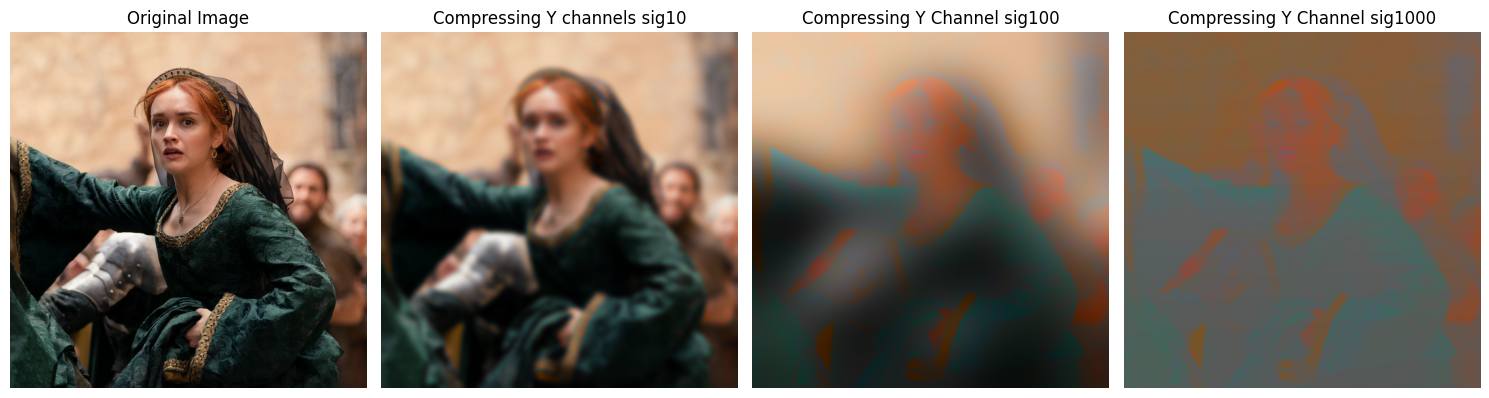

In [91]:
# Compress Y channels with different compression levels
im_presY_1000 = compress_Y(im, 1000)
im_presY_100 = compress_Y(im, 100)
im_presY_10 = compress_Y(im, 10)

# Plot all images on the same plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(im)
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Compressing Y channels sig10')
plt.imshow(im_presY_10)
plt.axis('off')


plt.subplot(1, 4, 3)
plt.title('Compressing Y Channel sig100')
plt.imshow(im_presY_100)
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Compressing Y Channel sig1000')
plt.imshow(im_presY_1000)
plt.axis('off')

plt.tight_layout()
plt.show()

Despite the fact that only one channel has been "compressed" (compared to two channels in the previous case), the reconstructed RGB image appears highly blurred and unnatural.

We notice that Compressing the Y channel affects the preservation of details and contrast much more significantly compared to the Cb and Cr channels. 
This is because the Y channel represents the luminance information, which is crucial for the perceived sharpness and structure of the image.